In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pickle
webleaf_path = "/content/drive/MyDrive/product_page_dataset/html/webleaf"


In [ ]:
from lxml import etree
import torch
import re

html = ""
texts = []
tags = []
shell_divs = 0

def clean_text(text):
  cleaned_text = ' '.join(re.sub(r'[^a-zA-Z\s.,!?\'\";:]', '', text).split())
  return cleaned_text

def process():
  for filename in os.listdir(webleaf_path):
    global shell_divs
    htmls = pickle.load(open(os.path.join(webleaf_path, filename), "rb"))
    for html in htmls:
      tree = etree.ElementTree(etree.HTML(html))
      root = tree.getroot()
      stack = [(root, 0)]
      i = 0
      e = []
      while stack:
          element, parent_id = stack.pop(0)
          if element.tag == "div" and len(element) == 1:
            shell_divs = shell_divs + 1
            stack.append((element[0], parent_id))
            continue
          for index, child in enumerate(element):
            if isinstance(child, etree._Comment) or child.tag in ['meta', 'style', 'script', 'svg']:
              continue
            tags.append(child.tag)
            if child.text and child.text.strip():
                texts.append(clean_text(child.text[:100]))
            elif child.get('alt'):
              texts.append(clean_text(child.get('alt')[:100]))
            elif child.get('title'):
              texts.append(clean_text(child.get('title')[:100]))
            elif child.get('aria-label'):
              texts.append(clean_text(child.get('aria-label')[:100]))
            else:
              texts.append("")
            i += 1
            e.append([parent_id, i])
            stack.append((child, i))
process()

In [ ]:
print(len(tags), len(texts), shell_divs)

19397661 19397661 2492379


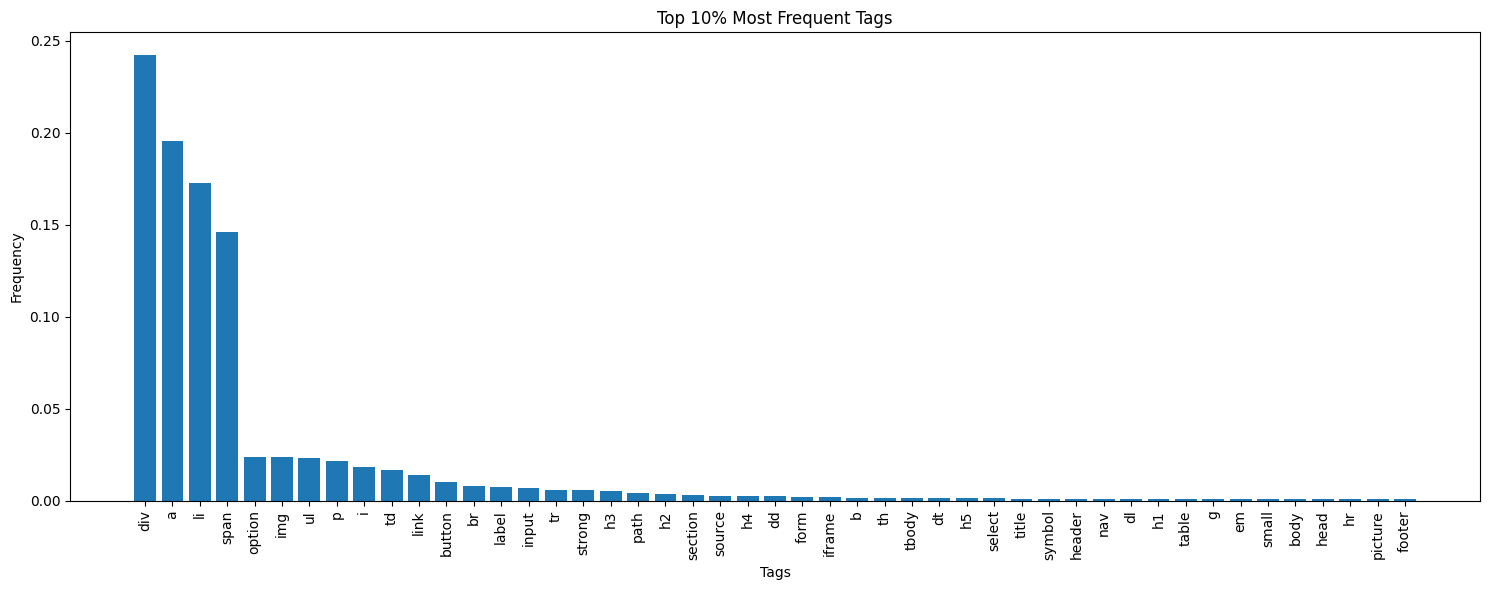

19397661 19397661 0.5301381978382499


In [ ]:
# prompt: create a histogram plot of the tags thats sorted and includes just the top 10%

import matplotlib.pyplot as plt
from collections import Counter

tag_counts = Counter(tags)
top_10_percent = int(len(tag_counts) * 0.05)
top_tags = tag_counts.most_common(top_10_percent)

plt.figure(figsize=(15, 6))
plt.bar([tag for tag, count in top_tags], [count/len(tags) for tag, count in top_tags])
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top 10% Most Frequent Tags')
plt.tight_layout()
plt.show()
print(len(tags), len(texts), shell_divs/ tag_counts.get('div'))

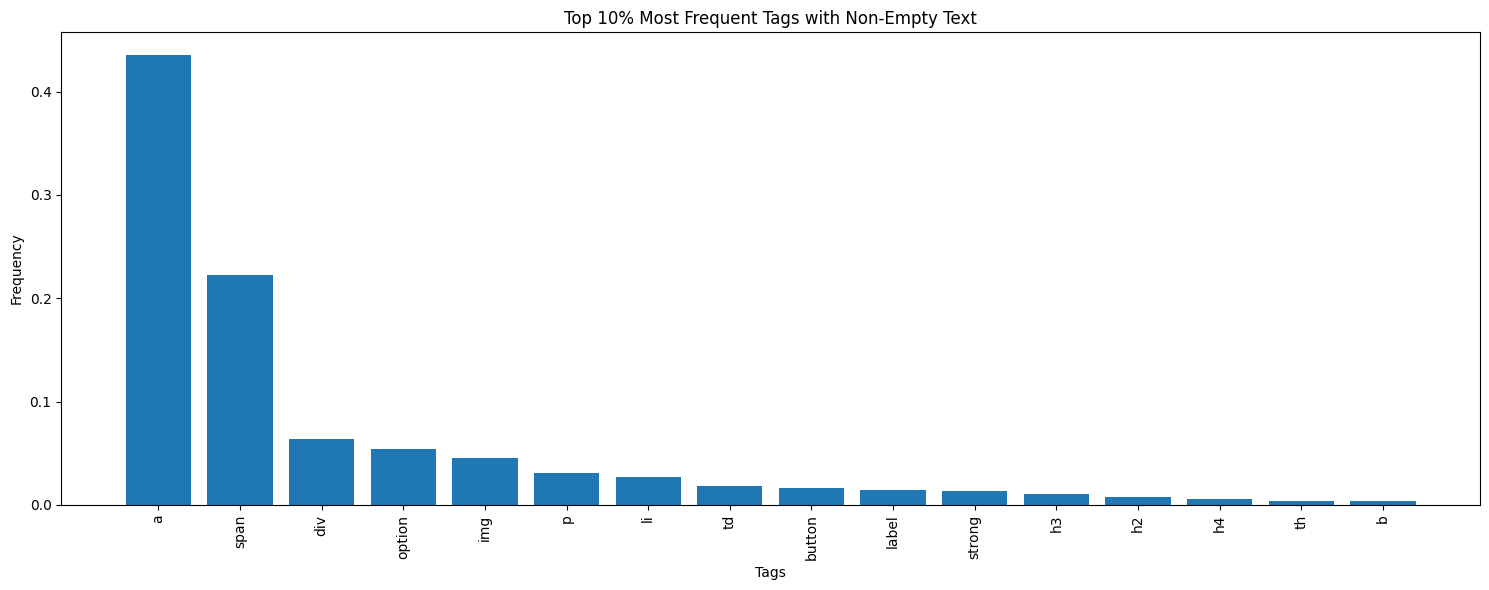

0.34006362932108153


In [ ]:
# prompt: create a histogram of tags with non-empty text  thats sorted and includes just the top 10%

from collections import Counter

# Filter tags with non-empty text
tags_with_text = [tag for tag, text in zip(tags, texts) if text.strip()]

# Count the occurrences of tags with non-empty text
tag_counts_with_text = Counter(tags_with_text)

# Calculate the top 10% of tags
top_10_percent = int(len(tag_counts_with_text) * 0.1)
top_tags_with_text = tag_counts_with_text.most_common(top_10_percent)

# Create the histogram
plt.figure(figsize=(15, 6))
plt.bar([tag for tag, count in top_tags_with_text], [count/len(tags_with_text) for tag, count in top_tags_with_text])
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top 10% Most Frequent Tags with Non-Empty Text')
plt.tight_layout()
plt.show()
print(len(tags_with_text)/ len(tags))


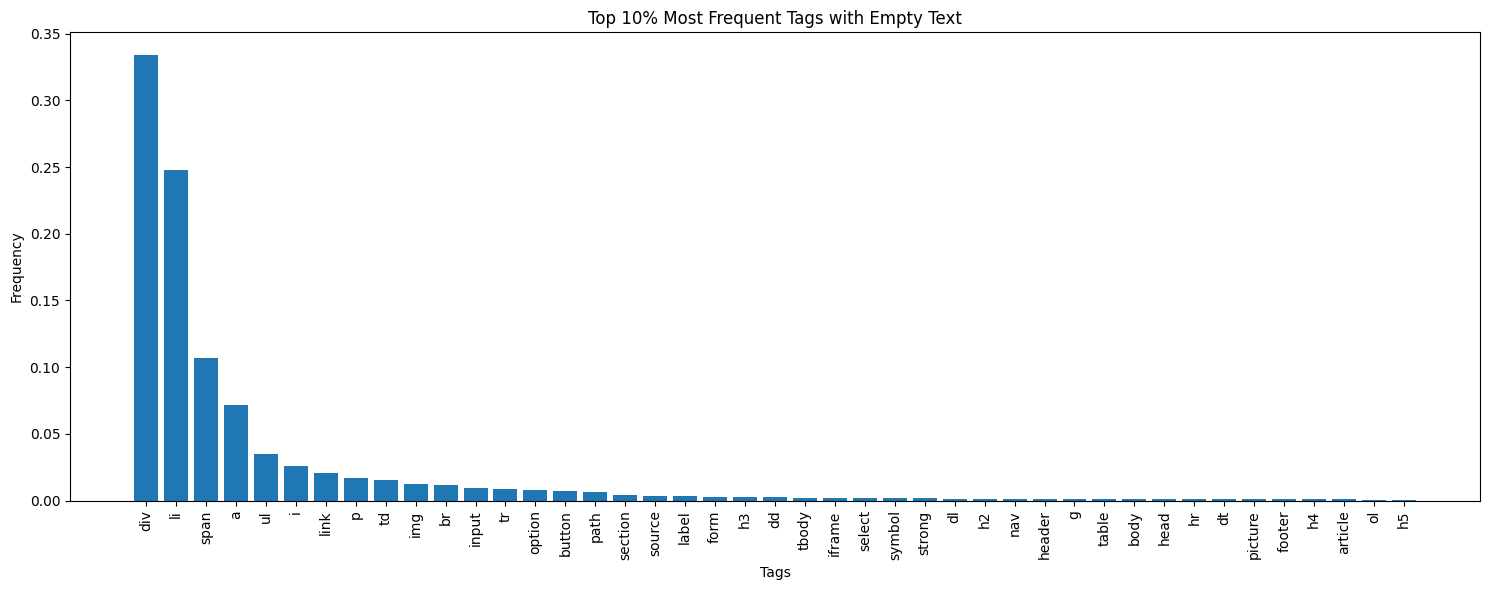

0.6599363706789184


In [ ]:
# prompt: create a histogram of tags with empty text  thats sorted and includes just the top 10%

from collections import Counter
import matplotlib.pyplot as plt

# Filter tags with empty text
tags_with_empty_text = [tag for tag, text in zip(tags, texts) if not text.strip()]

# Count the occurrences of tags with empty text
tag_counts_with_empty_text = Counter(tags_with_empty_text)

# Calculate the top 10% of tags
top_10_percent = int(len(tag_counts_with_empty_text) * 0.05)
top_tags_with_empty_text = tag_counts_with_empty_text.most_common(top_10_percent)

# Create the histogram
plt.figure(figsize=(15, 6))
plt.bar([tag for tag, count in top_tags_with_empty_text], [count/len(tags_with_empty_text) for tag, count in top_tags_with_empty_text])
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top 10% Most Frequent Tags with Empty Text')
plt.tight_layout()
plt.show()
print(len(tags_with_empty_text)/ len(tags))

In [ ]:
# prompt: print the text of every non-empty span

i = 0
for tag, text in zip(tags, texts):
  if text.strip():
    i += 1
    print(tag, text)
    if i > 1000:
      break


title Ram ACCEL Performance Fuel Injector wheelparts.com
a Back to Top
div Copyright
a Terms Conditions
a Privacy Policy
div close dialog
div SHOP TRUCK, JEEP UTV PARTS
div Copyright
strong Sign Up and Save!
span Updates on Special Offers Sales Events
div Welcome Guest
button Close
h4 Sign In Or Create an Account
button Close
h4 Reset Password
p An email is sent to
h4 Enter email address to change your password
p After you submit your email address, you'll receive an email a link that will let you change your pa
button Close
h4 Choose Your Secure Checkout Method
h5 Shop Safety Online
h5 Help
h5 Stores Events
h5 Resources
h5 Sales Support
h5 Phone Sales PT
h5 Customer Service PT
h1 ACCEL Performance Fuel Injector
label Email
a Order Status
a X Resource Center
a Installations Services
li Toll Free:
li Monday Friday: a.m. p.m.
li Saturday: a.m. p.m.
li Sunday: a.m. p.m.
li Monday Friday: a.m. p.m.
li Saturday: Closed
li Sunday: Closed
a Careers
span Call Our Stateside Experts!
a Home
a Pe